# Pandas 전처리

In [2]:
import pandas as pd
import numpy as np
Sample = {'Value': [5.52132, 6.572935, 7.21, 8.755, 9.9989]}
df = pd.DataFrame(Sample, columns=['Value'])

df['Value'].round(decimals = 3)
roundThree = np.round(df['Value'], decimals = 3)

df['Value'].apply(np.ceil)
df['Value'].apply(np.floor)



0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
Name: Value, dtype: float64

In [21]:
students = []
name = []
student01 = 'A, 100, 82, 96'
student02 = 'B, 92, 96, 88'
student03 = 'C, 90, 76, 74'
student04 = 'D, 98, 94, 85'
student05 = 'E, 95, 100, 68'
students.append(student01.split(',')[1:])
students.append(student02.split(',')[1:])
students.append(student03.split(',')[1:])
students.append(student04.split(',')[1:])
students.append(student05.split(',')[1:])
name.append(student01.split(',')[0])
name.append(student02.split(',')[0])
name.append(student03.split(',')[0])
name.append(student04.split(',')[0])
name.append(student05.split(',')[0])

data = pd.DataFrame(students, columns = ['국어', '영어', '수학'], index = name)

data['국어'] = data['국어'].astype('float')
data['수학'] = data['수학'].astype('float')
data['영어'] = data['영어'].astype('float')

calc = pd.DataFrame()
calc['합계'] = data.apply(lambda x: x.sum(), axis = 1).round(2)
calc['평균'] = data.apply(lambda x: x.mean(), axis = 1).round(2)
calc['분산'] = data.apply(lambda x: x.var(), axis = 1).round(2)
calc['표준편차'] = data.apply(lambda x: x.std(), axis = 1).round(2)

data['합계'] = calc['합계']
data['평균'] = calc['평균']
data['분산'] = calc['분산']
data['표준편차'] = calc['표준편차']

data

,국어,영어,수학,합계,평균,분산,표준편차
A,100.0,82.0,96.0,278.0,92.67,89.33,9.45
B,92.0,96.0,88.0,276.0,92.00,16.00,4.00
C,90.0,76.0,74.0,240.0,80.00,76.00,8.72
D,98.0,94.0,85.0,277.0,92.33,44.33,6.66
E,95.0,100.0,68.0,263.0,87.67,296.33,17.21


          국어        영어        수학
국어  1.000000  0.143526  0.547312
영어  0.143526  1.000000 -0.201854
수학  0.547312 -0.201854  1.000000


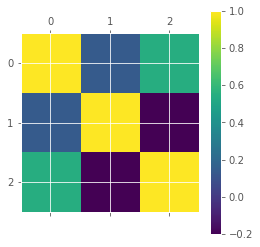

In [40]:
import matplotlib.pyplot as plt

print(data.iloc[:, :3].corr())
plt.matshow(data.iloc[:, :3].corr())
plt.colorbar()
plt.show()

In [59]:
cor1 = data.iloc[:, :3].corr()
cor1.style.background_gradient(cmap='coolwarm').set_precision(2)

,국어,영어,수학
국어,1.00,0.14,0.55
영어,0.14,1.00,-0.20
수학,0.55,-0.20,1.00


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44397 missing from current

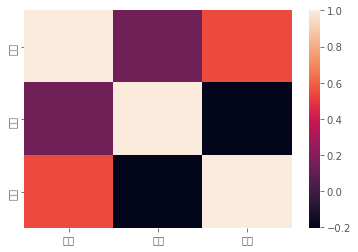

In [41]:
import seaborn as sns
sns.heatmap(cor1, xticklabels = cor1.columns.values,
                  yticklabels = cor1.columns.values,)

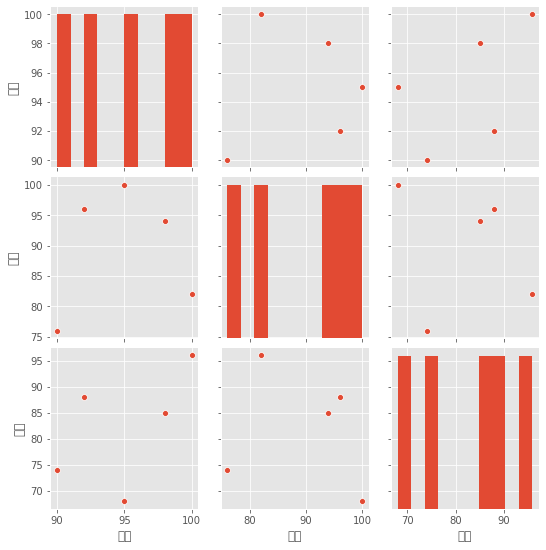

In [42]:
sns.pairplot(data.iloc[:, :3])

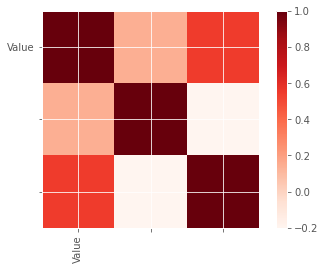

In [43]:
plt.style.use('ggplot')
plt.imshow(cor1, cmap=plt.cm.Reds, interpolation='nearest')
tick_marks = [i for i in range(len(cor1.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.colorbar()
plt.show()

In [80]:
import pymysql
import numpy
import pandas as pd

conn = pymysql.connect(host='localhost', port=3307, user='root',
                       passwd='0000', db='sungjuk_test', charset='utf8mb4',
                       cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
cursor.execute('select * from student')
rez = cursor.fetchall()
df = pd.DataFrame(rez)

print(df.describe())
print(df.dtypes)
print(df.shape)
df

           bunho         kor         mat         eng       total     average
count   9.000000    9.000000    9.000000    9.000000    9.000000    9.000000
mean    6.777778   82.666667   82.444444   81.333333  246.444444   82.147778
std     5.826186   18.947295   14.680864   19.019727   46.257732   15.417555
min     1.000000   50.000000   60.000000   42.000000  180.000000   60.000000
25%     3.000000   74.000000   80.000000   70.000000  230.000000   76.670000
50%     5.000000   80.000000   80.000000   80.000000  240.000000   80.000000
75%     7.000000  100.000000   99.000000   99.000000  298.000000   99.330000
max    17.000000  100.000000  100.000000  100.000000  300.000000  100.000000
bunho           int64
name           object
kor             int64
mat             int64
eng             int64
total           int64
average       float64
grade          object
schoolcode     object
dtype: object
(9, 9)


,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,1,김만덕,100,99,99,298,99.33,A,CH00000001
1,2,고려인,100,99,99,298,99.33,A,CH00000001
2,3,종로구,100,80,70,250,83.33,B,IC00000001
3,4,전공인,80,80,80,240,80.00,B,SE00000001
4,5,전공이,80,80,80,240,80.00,B,SE00000001
5,6,만세,74,64,92,230,76.67,C,None
6,7,한국이,100,100,100,300,100.00,A,CH00000001
7,16,Test,60,80,42,182,60.67,D,None
8,17,Min,50,60,70,180,60.00,D,None


In [83]:
# 성적과 총점 평균에 대하여 분산, 표준편차, 합계를 구하시오.
# corr를 구한 다음 style.background_gradient 방식으로 출력하시오.
# 선형대수의 eigen decompotition을 실행하시오.

df = df.loc[:, 'kor':'average']
print('\n', df.var(), '\n')
print('\n', df.std(), '\n')
print('\n', df.corr(), '\n')

# cal = pd.DataFrame()
# cal['합계'] = df.apply(lambda x: x.sum(), axis = 1).round(2)
# cal['평균'] = df.apply(lambda x: x.mean(), axis = 1).round(2)
# cal['분산'] = df.apply(lambda x: x.var(), axis = 1).round(2)
# cal['표준편차'] = df.apply(lambda x: x.std(), axis = 1).round(2)

# df['합계'] = cal['합계']
# df['평균'] = cal['평균']
# df['분산'] = cal['분산']
# df['표준편차'] = cal['표준편차']

cor = df.corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

cor


 kor         359.000000
mat         215.527778
eng         361.750000
total      2139.777778
average     237.700994
dtype: float64 


 kor        18.947295
mat        14.680864
eng        19.019727
total      46.257732
average    15.417555
dtype: float64 


               kor       mat       eng     total   average
kor      1.000000  0.807681  0.664590  0.939196  0.939180
mat      0.807681  1.000000  0.492731  0.850795  0.850793
eng      0.664590  0.492731  1.000000  0.839765  0.839782
total    0.939196  0.850795  0.839765  1.000000  1.000000
average  0.939180  0.850793  0.839782  1.000000  1.000000 



,kor,mat,eng,total,average
kor,1.000000,0.807681,0.664590,0.939196,0.939180
mat,0.807681,1.000000,0.492731,0.850795,0.850793
eng,0.664590,0.492731,1.000000,0.839765,0.839782
total,0.939196,0.850795,0.839765,1.000000,1.000000
average,0.939180,0.850793,0.839782,1.000000,1.000000


In [91]:
eigen_result = np.linalg.eig(df.corr())
print(eigen_result)
eigen_result[1][:, 0].dot(eigen_result[1][:, 1])

(array([4.31455650e+00, 5.26962492e-01, 1.58480997e-01, 2.46517723e-17,
       1.10402486e-08]), array([[ 4.53770798e-01,  1.95644255e-01, -7.59541463e-01,
        -3.41625388e-01,  2.49407797e-01],
       [ 4.16592427e-01,  6.10336612e-01,  5.88637572e-01,
        -2.64700364e-01,  1.93337778e-01],
       [ 3.96752459e-01, -7.65420134e-01,  2.76364562e-01,
        -3.42931345e-01,  2.50479990e-01],
       [ 4.81212297e-01, -4.08771278e-02, -1.06613452e-02,
         8.34040709e-01,  2.66507440e-01],
       [ 4.81212036e-01, -4.09099546e-02, -1.05611834e-02,
         1.90061980e-09, -8.75585412e-01]]))


0.0

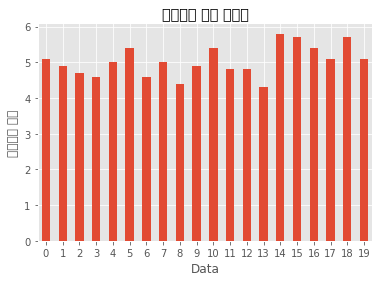

In [99]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
path = 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF'
fontprop = font_manager.FontProperties(fname=path, size=18)

iris = sns.load_dataset('iris')
itianic = sns.load_dataset('titanic')

iris.sepal_length[:20].plot(kind='bar', rot = 0)
plt.title('꽃받침의 길이 시각화')
plt.xlabel('Data')
plt.ylabel('꽃받침의 길이')
plt.show()

   Year  Unemployment_Rate
0  1920                9.8
1  1930               12.0
2  1940                8.0
3  1950                7.2
4  1960                6.9
5  1970                7.0
6  1980                6.5
7  1990                6.2
8  2000                5.5
9  2010                6.3


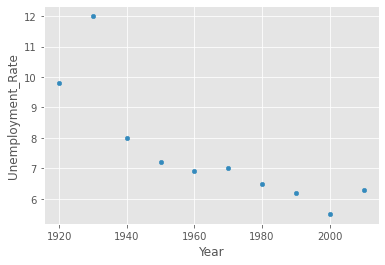

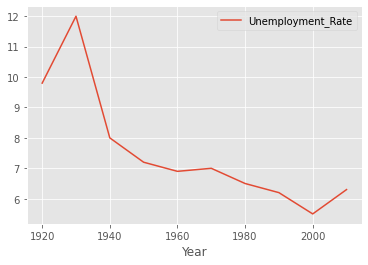

In [105]:
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
       }
 
df = pd.DataFrame(Data,columns=['Year','Unemployment_Rate'])
print (df) 

# line, bar, barh, hist, box, kde, density, area, pie, scatter, 
df.plot(x='Year', y='Unemployment_Rate', kind='scatter')
df.plot(x='Year', y='Unemployment_Rate', kind='line')

,Country,GDP_Per_Capita
0,USA,45000
1,Canada,42000
2,Germany,52000
3,UK,49000
4,France,47000


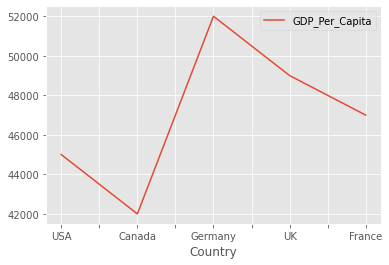

In [108]:
Data = {'Country': ['USA', 'Canada', 'Germany', 'UK', 'France'], 'GDP_Per_Capita':[45000,42000,52000,49000,47000]}
df = pd.DataFrame(Data, columns=['Country', 'GDP_Per_Capita'])
df.plot(x = 'Country', y='GDP_Per_Capita', kind = 'line')
df

In [123]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    color = 'red' if val <0 else 'blue'
    return 'color: %s' %color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color:pink' if v else '' for v in is_max]


s = df.style.applymap(color_negative_red).apply(highlight_max)
s

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [136]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()
data[data.notnull()]
data.dropna()

df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])

df.fillna(method = 'ffill')
df.fillna(method = 'bfill')

,0,1,2
0,1.0,3.0,2
1,2.0,3.0,5
2,NaN,4.0,6


,0,1,2,3,4,5,6,7,8
1,1.0,6,148,72,35,33.6,0.627,50,Yes
2,2.0,1,85,66,29,26.6,0.351,31,No
3,3.0,1,89,66,23,28.1,0.167,21,No
4,4.0,3,78,50,32,31,0.248,26,Yes
5,5.0,2,197,70,45,30.5,0.158,53,Yes
...,...,...,...,...,...,...,...,...,...
328,328.0,2,88,58,26,28.4,0.766,22,No
329,329.0,9,170,74,31,44,0.403,43,Yes
330,330.0,10,101,76,48,32.9,0.171,63,No
331,331.0,5,121,72,23,26.2,0.245,30,No


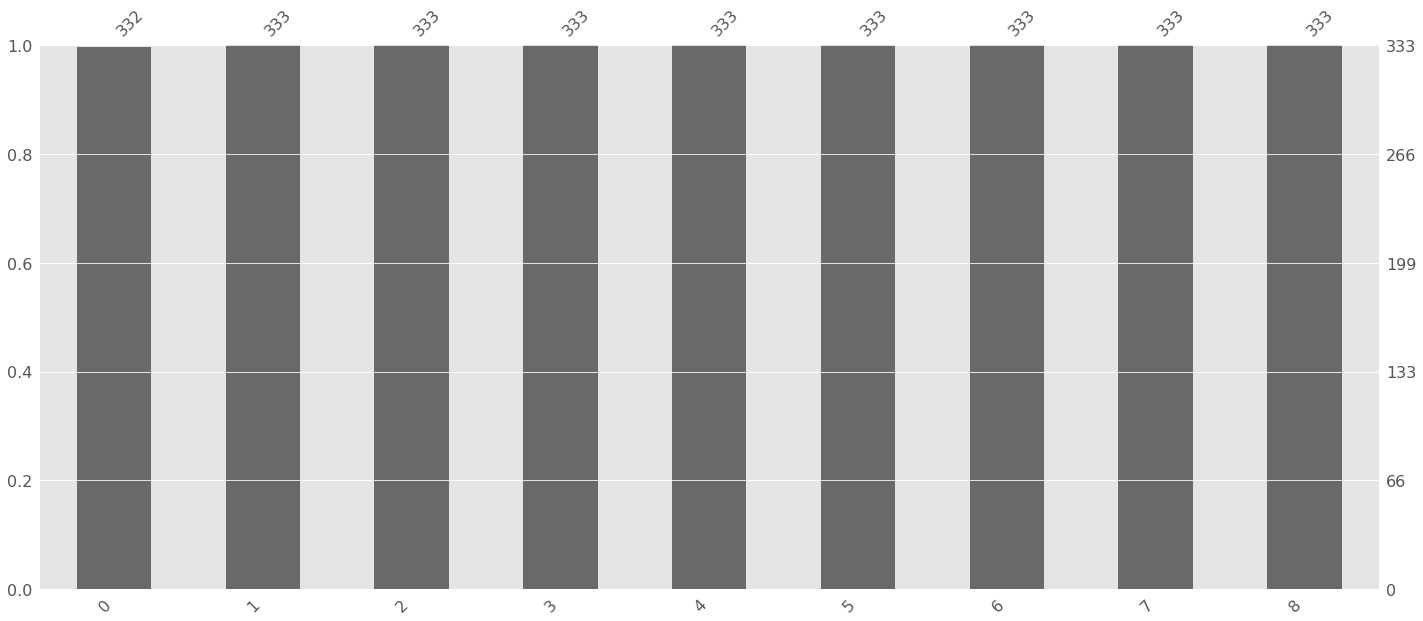

In [145]:
import missingno as msno
df = pd.read_csv('pima.csv', header=None)
msno.bar(df)

df.dropna()